In [5]:
def get_ticker_data(ticker, time_period="5y", time_interval="1d"):

    import yfinance as yf
    data = yf.download(ticker, period=time_period, interval=time_interval)

    return data

In [6]:
from sklearn.preprocessing import MinMaxScaler

ticker = "AAPL"
data = get_ticker_data(ticker)

# for our purposes, we will get specifically the close price
# (could potentially utilize the other pieces of price data)
data = data[['Close']]
data.dropna(inplace=True)

# and scale it
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

[*********************100%%**********************]  1 of 1 completed


C:\Users\zwbur\AppData\Local\Temp\ipykernel_27848\948797264.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [7]:
# then, for the LSTM model, I split the data into 60 pieces
T = 60
X = []
y = []

for i in range(T, len(scaled_data)):
    X.append(scaled_data[i-T:i, 0])
    y.append(scaled_data[i, 0])

# convert the result into a numpy array
import numpy as np
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# and split it up into the train and test portions
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/100
30/30 [==============================] - 7s 38ms/step - loss: 0.0368
Epoch 2/100
30/30 [==============================] - 1s 37ms/step - loss: 0.0073
Epoch 3/100
30/30 [==============================] - 1s 37ms/step - loss: 0.0047
Epoch 4/100
30/30 [==============================] - 1s 37ms/step - loss: 0.0047
Epoch 5/100
30/30 [==============================] - 6s 190ms/step - loss: 0.0044
Epoch 6/100
30/30 [==============================] - 1s 40ms/step - loss: 0.0047
Epoch 7/100
30/30 [==============================] - 1s 38ms/step - loss: 0.0040
Epoch 8/100
30/30 [==============================] - 6s 192ms/step - loss: 0.0039
Epoch 9/100
30/30 [==============================] - 1s 38ms/step - loss: 0.0038
Epoch 10/100
30/30 [==============================] - 1s 39ms/step - loss: 0.0035
Epoch 11/100
30/30 [==============================] - 6s 193ms/step - loss: 0.0035
Epoch 12/100
30/30 [==============================] - 1s 40ms/step - loss: 0.0036
Epoch 13/100
30/30 [==

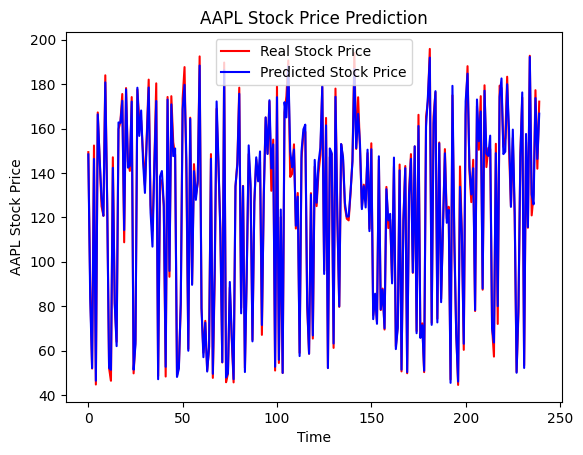

In [8]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predicting on the test set to evaluate the model
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualizing the results
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{ticker} Stock Price')
plt.legend()
plt.show()

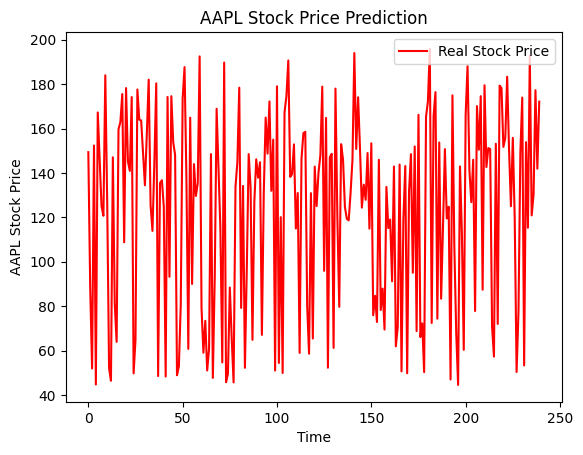

In [9]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{ticker} Stock Price')
plt.legend()
plt.show()

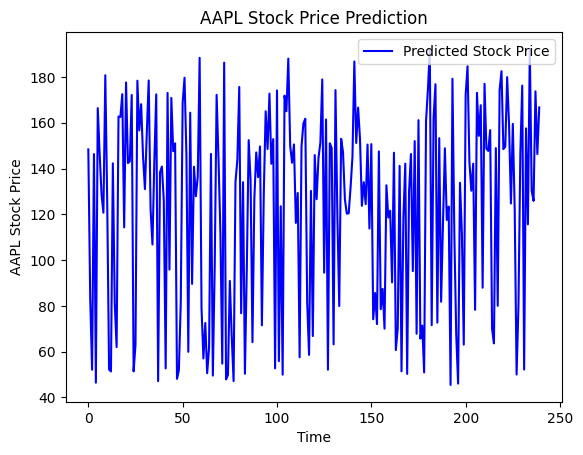

In [10]:
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{ticker} Stock Price')
plt.legend()
plt.show()